In [1]:
import json
import ast

import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import my_hypotheses as hyp
import LichessAnalys as li

In [3]:
df = pd.read_csv('./move_score_and_clocks.csv', sep=',')

In [4]:
df['clocks_list_new'] = [ast.literal_eval(i) for i in df['clocks_list']]
df['move_score_new'] = [ast.literal_eval(i) for i in df['move_score']]

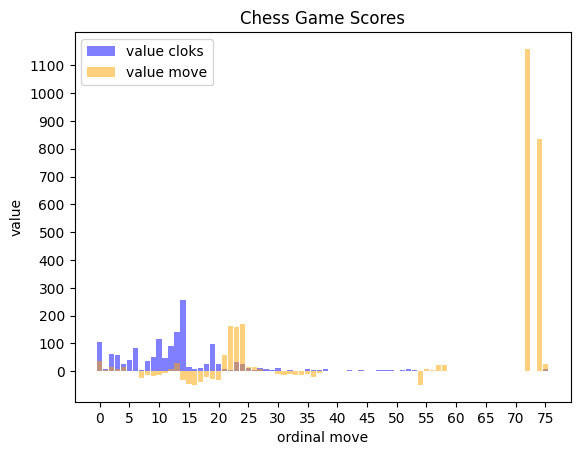

In [29]:
number_game = 7
def create_plot_eval_cloks(self, number_game)
    len_move = len(df['move_score_new'][number_game])
    max_score = max(df['move_score_new'][number_game])
    plt.bar(range(len_move), df['clocks_list_new'][number_game],
        color='blue',
        width=0.9,
        bottom=1,
        alpha=0.5)

    plt.bar(range(len_move), df['move_score_new'][number_game],
        color='orange',
        width=0.9,
        bottom=1,
        alpha=0.5)
    plt.legend(['value cloks', 'value move'])
    plt.xticks(np.arange(0,len_move,5))
    plt.yticks(np.arange(0,max_score,100))
    plt.ylabel('value')
    plt.xlabel('ordinal move')
    plt.title('Chess Game Scores')
    plt.savefig('sample_plot.png')